In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("BlackFriday.csv")

## Dataset Walkthrough


In [3]:
df.shape

(537577, 12)

Names and data types of the dataset:


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


Checking the duplicate values in the dataset

In [5]:
df.duplicated().sum()

0

Chcking the null or missing values in the dataset:

In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

Deleting the unnecessary columns

In [7]:
del df["Product_Category_2"]
del df["Product_Category_3"]

In [8]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200


## Analyzing Columns


Unique users (User_ID) 

In [9]:
df['User_ID'].nunique()

5891

products (Product_ID)

In [10]:
df['Product_ID'].nunique()

3623

Uniques Gendergroup :

In [11]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

Unique Age group :

In [12]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

 distribution of purchase amounts (Purchase) 

C:\Users\Tirtha Ghosh\AppData\Local\Temp\ipykernel_4776\151967205.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Purchase'])
C:\Users\Tirtha Ghosh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Purchase', ylabel='Density'>

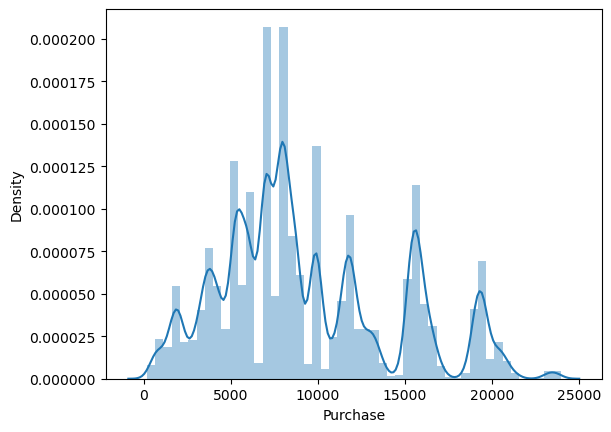

In [13]:
sns.distplot(df['Purchase'])

## Analyzing Gender


In [14]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200


In [15]:
#Create dataframe of total number of male and feamle customer:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']), len(df[df['Gender'] == 'F'])]},
                    index = ['Male', 'Female'])
data

,Ratio
Male,405380
Female,132197


In [16]:
male=df[df["Gender"]=='M']
female=df[df["Gender"]=='F']

# Total purcahse by male and female:
f1=pd.DataFrame({'Total_purchase':[male["Purchase"].sum(),female["Purchase"].sum()]},index=["Male",'Female'])
f1

,Total_purchase
Male,3853044357
Female,1164624021


In [17]:
# Avg purchase by each male and female:
f2=pd.DataFrame({'Mean_purchase':[male["Purchase"].mean(),female["Purchase"].mean()]},index=["Male",'Female'])
f2

,Mean_purchase
Male,9504.771713
Female,8809.761349


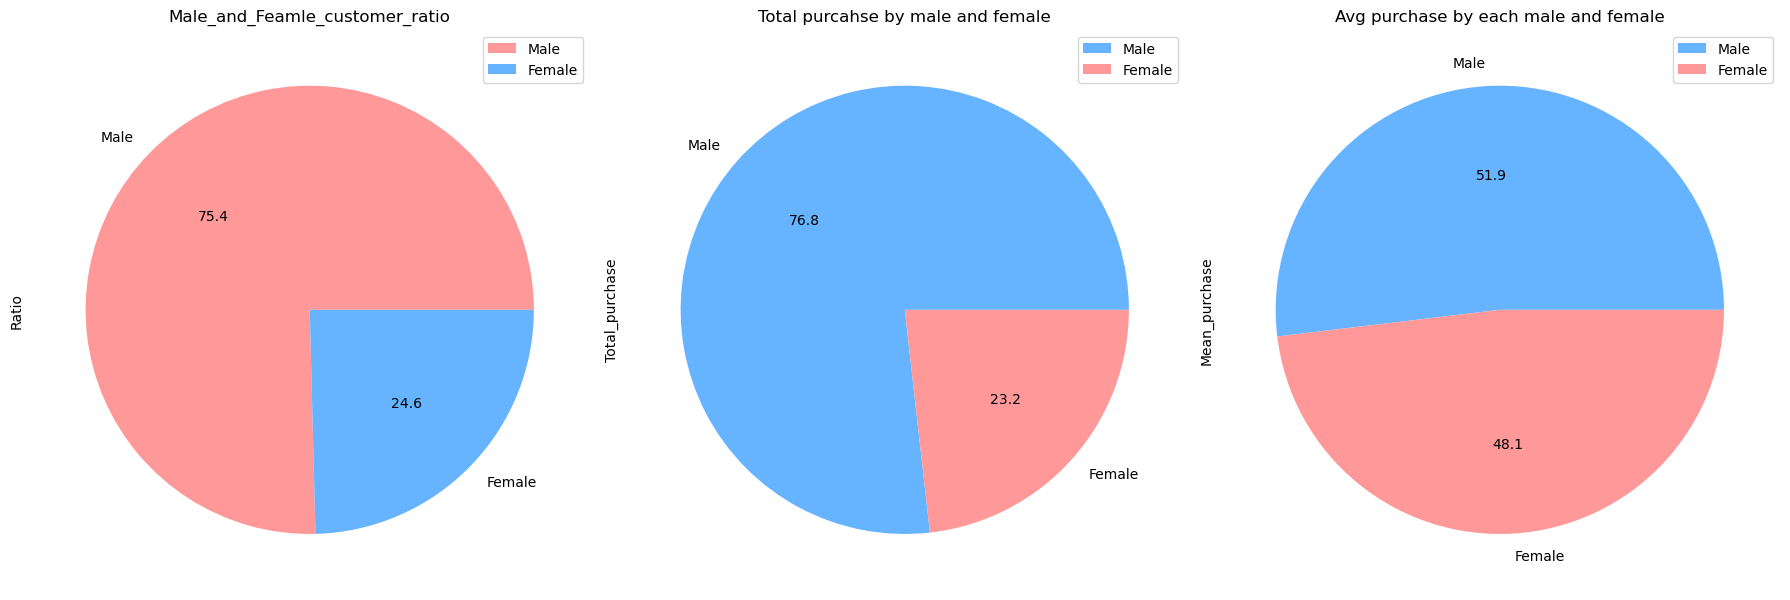

In [18]:
# Create a figure with three subplots in one row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the pie chart
data.plot(kind='pie', y='Ratio', autopct='%.1f', title='Male_and_Feamle_customer_ratio', colors=['#ff9999','#66b3ff'], ax=axes[0])
f1.plot(kind='pie', y='Total_purchase', title='Total purcahse by male and female', autopct='%.1f', colors=['#66b3ff','#ff9999'], ax=axes[1])
f2.plot(kind='pie', y='Mean_purchase', title='Avg purchase by each male and female', autopct='%.1f', colors=['#66b3ff','#ff9999'], ax=axes[2])


plt.tight_layout()
plt.show()


Although the number of male customers are higher than female customers, leading to higher overall purchases from males, the average purchasing power of both male and female customers is nearly equal.

## Analyzing Age Column:

Product distribution with Age groups

In [19]:
df.groupby("Age").size().sort_values(ascending=False)

Age
26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
dtype: int64

Purchase by different age group :

In [20]:
y=df.groupby("Age").sum()['Purchase'].sort_values(ascending=False)
y

Age
26-35    1999749106
36-45    1010649565
18-25     901669280
46-50     413418223
51-55     361908356
55+       197614842
0-17      132659006
Name: Purchase, dtype: int64

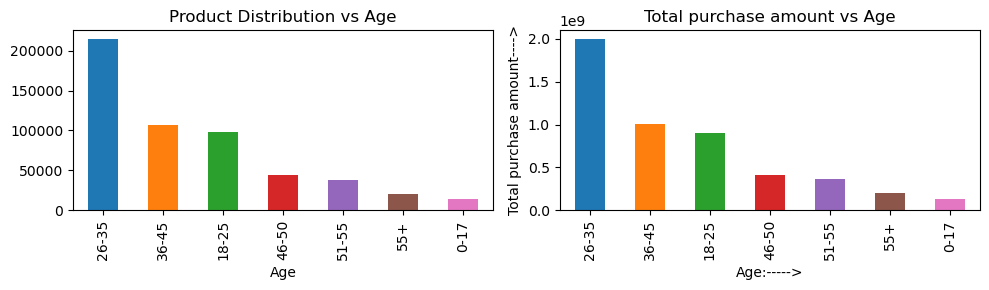

In [21]:
fig,axes=plt.subplots(1,2,figsize=(10,3))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#plot the Product Distribution by age graph:
df.groupby("Age").size().sort_values(ascending=False).plot(kind='bar',title="Product Distribution vs Age",color=colors,ax=axes[0])
plt.xlabel('Age----->')
plt.ylabel('Total selling products---->')


#Plot Total purchase amount vs Age graph:
y.plot(kind="bar",color=colors,title='Total purchase amount vs Age')
plt.xlabel('Age:----->')
plt.ylabel('Total purchase amount---->')


plt.tight_layout()
plt.show()

## Analyzing Occupation Column:

Product distribution by different Occupation

In [22]:
df.groupby("Occupation").size().sort_values(ascending=False)

Occupation
4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
dtype: int64

In [23]:
x=df.groupby("Occupation").sum()['Purchase'].sort_values(ascending=False)

In [24]:
x 

Occupation
4     657530393
0     625814811
7     549282744
1     414552829
17    387240355
12    300672105
20    292276985
14    255594745
16    234442330
2     233275393
6     185065697
3     160428450
15    116540026
10    114273954
5     112525355
11    105437359
19     73115489
13     71135744
18     60249706
9      53619309
8      14594599
Name: Purchase, dtype: int64

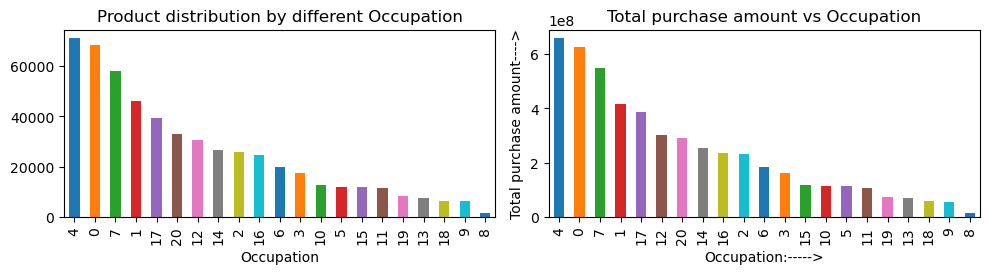

In [25]:
fig,axes=plt.subplots(1,2,figsize=(10,3))

#Product distribution by different Occupationplot:
df.groupby("Occupation").size().sort_values(ascending=False).plot(kind='bar',color=colors,title='Product distribution by different Occupation',ax=axes[0])
plt.xlabel('Occupation:----->')
plt.grid(True, axis='y',alpha=0.3)
plt.ylabel('Total selling products---->')


#Total purchase amount vs Occupation plot :
x.plot(kind="bar",color=colors,title='Total purchase amount vs Occupation',ax=axes[1])
plt.xlabel('Occupation:----->')
plt.ylabel('Total purchase amount---->')


plt.tight_layout()
plt.show()

## Analyzing City_Category Column:

In [26]:
df.groupby("City_Category").size().sort_values(ascending=False)

City_Category
B    226493
C    166446
A    144638
dtype: int64

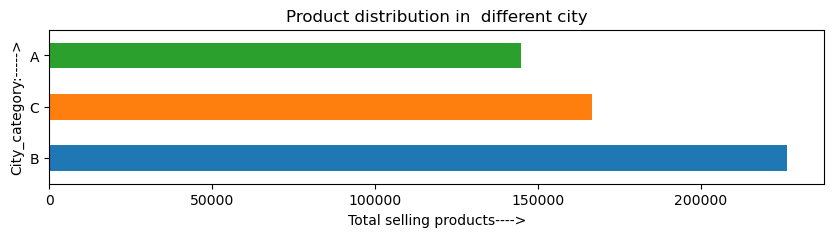

In [27]:
plt.figure(figsize=(10,2))
df.groupby("City_Category").size().sort_values(ascending=False).plot(kind='barh',color=colors,title='Product distribution in  different city')
plt.ylabel('City_category:----->')
plt.xlabel('Total selling products---->')
plt.show()

## Analyzing Marital_Status Column:

Unmarried denoted by 0, and married denoted by 1

In [28]:
df.groupby("Marital_Status").size().sort_values(ascending=False)

Marital_Status
0    317817
1    219760
dtype: int64

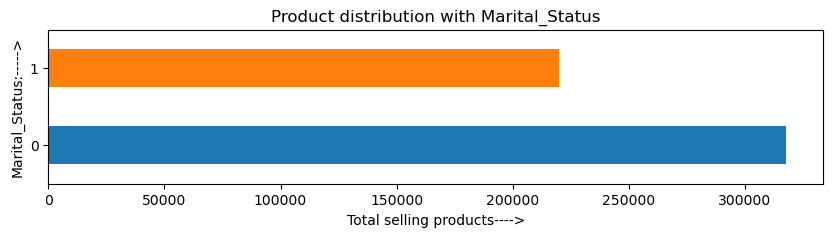

In [29]:
plt.figure(figsize=(10,2))
df.groupby("Marital_Status").size().sort_values(ascending=False).plot(kind='barh',color=colors,title='Product distribution with Marital_Status')
plt.ylabel('Marital_Status:----->')
plt.xlabel('Total selling products---->')
plt.show()

### Top 10 selling products:

In [30]:
y=df.groupby('Product_ID').size().nlargest(10).sort_values(ascending =False)
x=pd.DataFrame(y)

In [31]:
x.index

Index(['P00265242', 'P00110742', 'P00025442', 'P00112142', 'P00057642',
       'P00184942', 'P00046742', 'P00058042', 'P00059442', 'P00145042'],
      dtype='object', name='Product_ID')

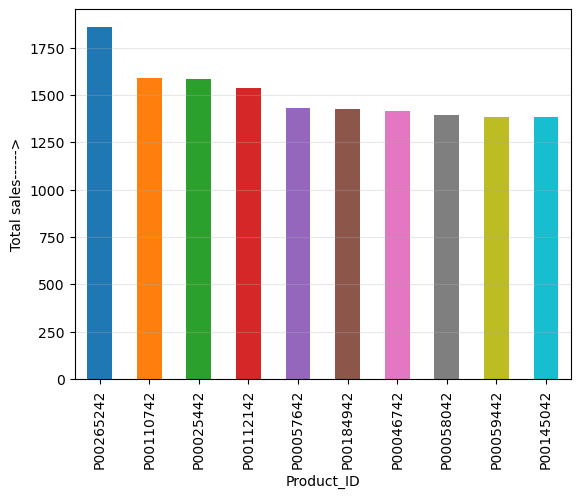

In [32]:
df.groupby('Product_ID').size().nlargest(10).sort_values(ascending =False).plot(kind='bar',color=colors)
plt.ylabel('Total sales------>')
plt.grid(True, axis='y',alpha=0.3)

plt.show()


## Analyzing Stay_In_Current_City_Years Column:

In [33]:
df.groupby("Stay_In_Current_City_Years").size().sort_values(ascending=False)

Stay_In_Current_City_Years
1     189192
2      99459
3      93312
4+     82889
0      72725
dtype: int64

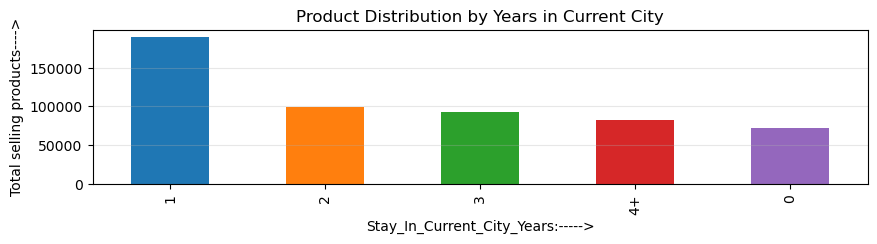

In [34]:
plt.figure(figsize=(10,2))
df.groupby("Stay_In_Current_City_Years").size().sort_values(ascending=False).plot(kind='bar',
                                            color=colors,title="Product Distribution by Years in Current City")
plt.xlabel('Stay_In_Current_City_Years:----->')
plt.ylabel('Total selling products---->')
plt.grid(True, axis='y',alpha=0.3)
plt.show()

## Multi-Column Analysis:

### Compare purchasing  behavior with different Age groups for each Gender:

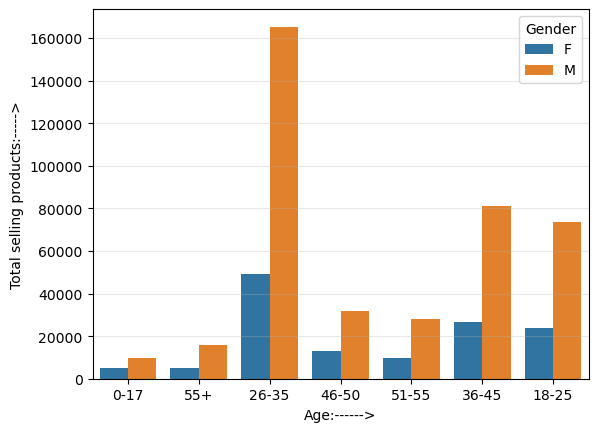

In [35]:
sns.countplot(data=df,x="Age",hue='Gender')
plt.xlabel('Age:------>')
plt.ylabel('Total selling products:----->')
plt.grid(True, axis='y',alpha=0.3)
plt.show()

### Compare purchasing behavior with Marital status for each Gender:

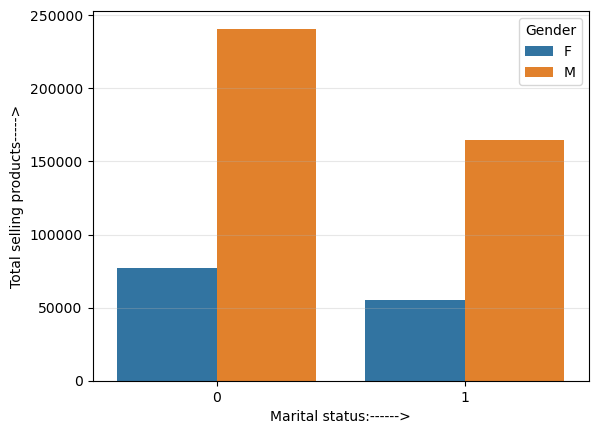

In [36]:
sns.countplot(data=df,x="Marital_Status",hue='Gender')
plt.xlabel('Marital status:------>')
plt.ylabel('Total selling products----->')
plt.grid(True, axis='y',alpha=0.3)
plt.show()

### Compare purchaing behaviuor with city_category for each gender/ marital_status/for each age group :

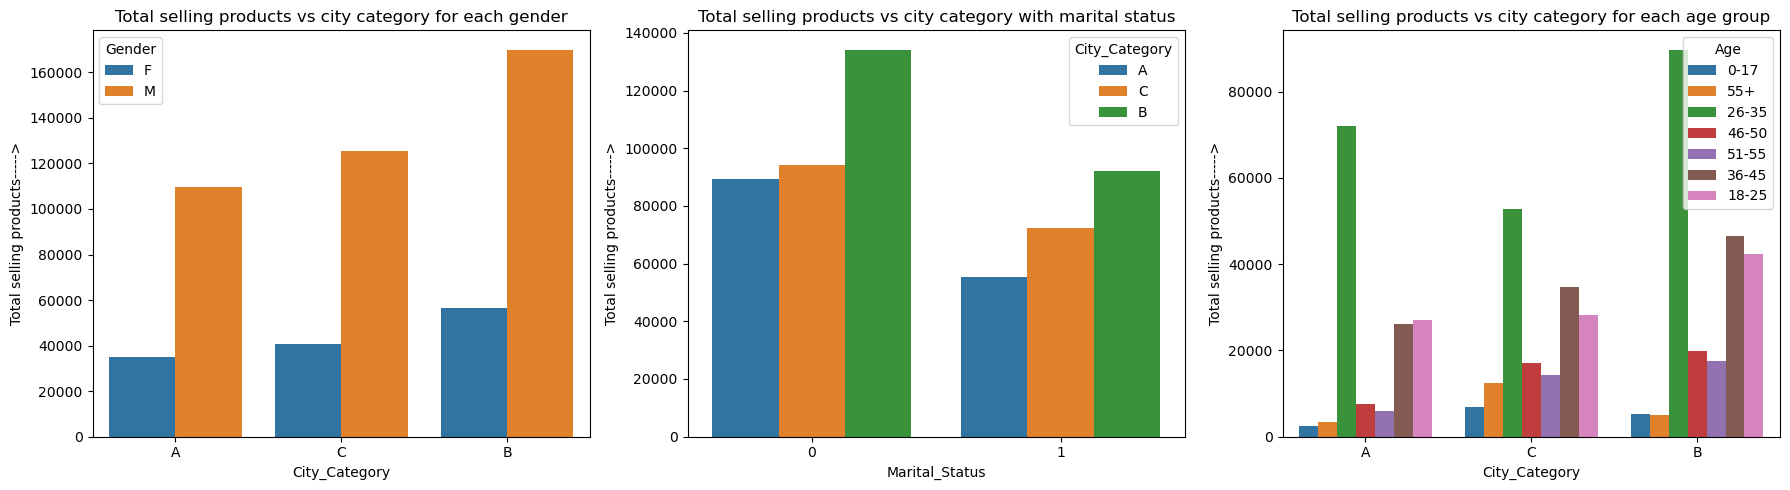

In [37]:
plt.figure(figsize=(18,5))

#plot Total selling products vs city category for each gender:
plt.subplot(1,3,1)
sns.countplot(data=df,x='City_Category',hue='Gender')
plt.title('Total selling products vs city category for each gender')
plt.ylabel('Total selling products----->')

#plot Total selling products vs city category with marital status:
plt.subplot(1,3,2)
sns.countplot(data=df,x='Marital_Status',hue='City_Category')
plt.title('Total selling products vs city category with marital status')
plt.ylabel('Total selling products----->')

#plot Total selling products vs city category for each age group
plt.subplot(1,3,3)
sns.countplot(data=df,x='City_Category',hue='Age')
plt.title('Total selling products vs city category for each age group')
plt.ylabel('Total selling products----->')

plt.tight_layout()
plt.show()

### Comapre purchase behaviuor with Years in Current City for each gender

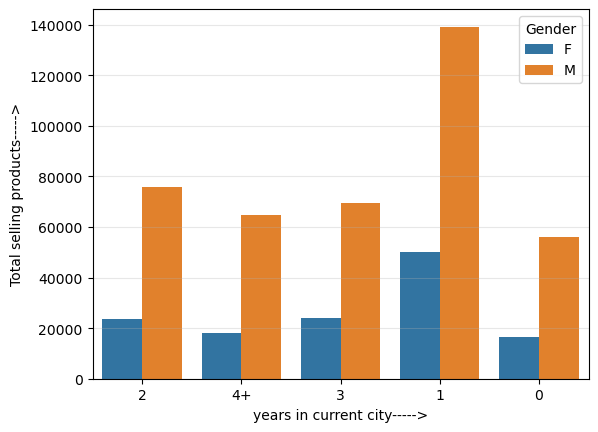

In [38]:
sns.countplot(x=df['Stay_In_Current_City_Years'],hue='Gender',data=df)
plt.ylabel('Total selling products----->')
plt.xlabel('years in current city----->')
plt.grid(True, axis='y',alpha=0.3)
plt.show()

### Comapre purchase behaviuor with occupation for ecah gender:

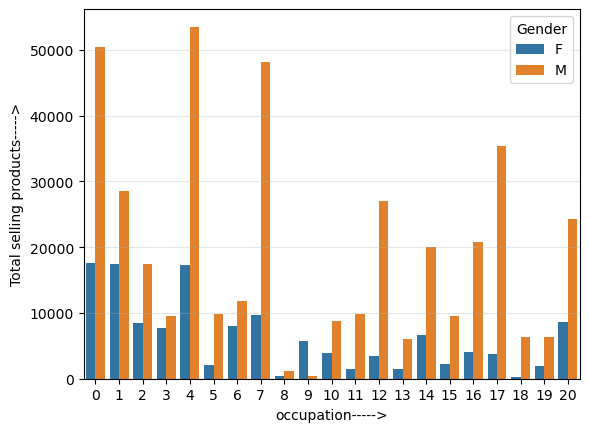

In [39]:
sns.countplot(x=df['Occupation'],hue='Gender',data=df)
plt.ylabel('Total selling products----->')
plt.xlabel('occupation----->')
plt.grid(True, axis='y',alpha=0.3)
plt.show()

### Comapre purchase behaviuor vs occupation with Marital status:

In [40]:
# Chnge the data types of Marital_Status from int64 to string :
df['Marital_Status'] = df['Marital_Status'].astype(str)

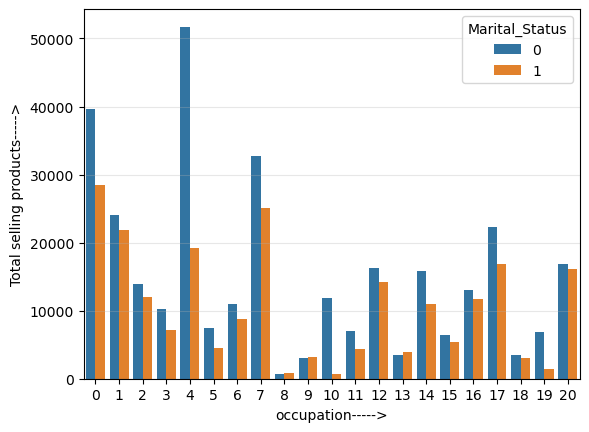

In [41]:
sns.countplot(x=df['Occupation'],hue='Marital_Status',data=df)
plt.ylabel('Total selling products----->')
plt.xlabel('occupation----->')
plt.grid(True, axis='y',alpha=0.3)
plt.show()

### Merge the gender and marital status column :

In [42]:
l=[]
for i in range (len(df)):
   l.append(df['Gender'][i]+"_"+str(df['Marital_Status'][i]))

df['Gender_Marital']=l

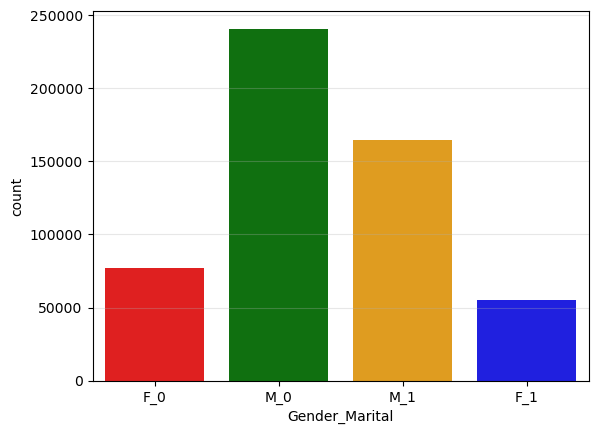

In [43]:
custom_palette = sns.color_palette(['red', 'green', 'orange','blue'])
sns.countplot(x=df['Gender_Marital'],data=df,palette=custom_palette)
plt.grid(True, axis='y',alpha=0.3)

plt.show()

We have introduced a new column, gender_marital, which consolidates the gender and marital status columns. This enhancement facilitates the identification of customer segments, such as male married, male unmarried, female married, and female unmarried. The analysis reveals that the top customer segment is male unmarried, followed by male married, female unmarried, and female married.



### Integrate age with the gender_marital column:


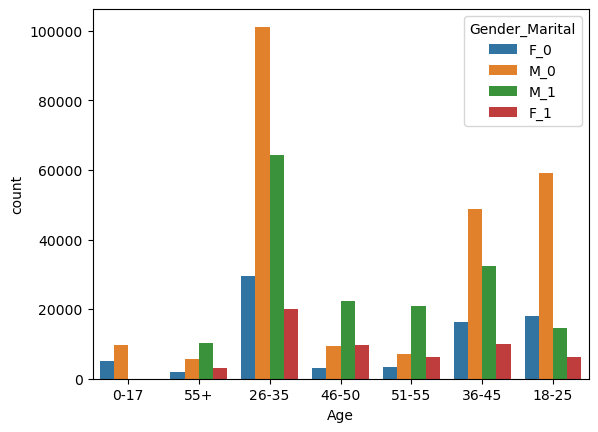

In [44]:
sns.countplot(data=df,x=df['Age'],hue=df['Gender_Marital'])
plt.show()

Analysis of the visualization indicates that the majority of our customers fall within the age groups of 18-35. Among these segments, unmarried males represent the highest proportion of our customer base.And  46+ age group segment has more married_male customer.

### Integrate Product_Category_1 with the gender_marital column :)

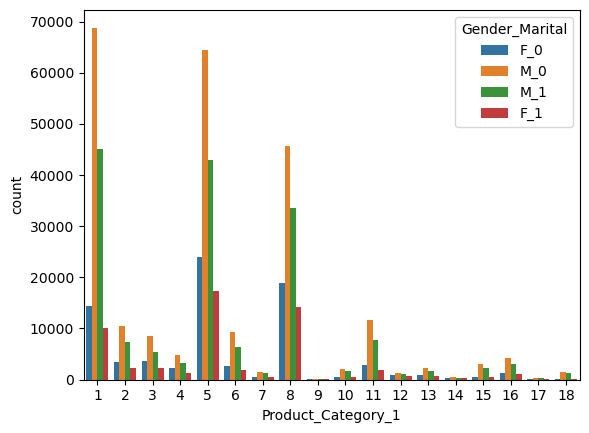

In [45]:
sns.countplot(data=df,x=df['Product_Category_1'],hue=df['Gender_Marital'])
plt.show()

###### 1.Product categories 1, 5, and 8 are the most popular across all customer segments.
###### 2.Unmarried males exhibit the highest purchasing frequency across all product categories, indicating a strong preference or need for these products within this demographic.
###### 3.Unmarried females demonstrate a notable preference for product categories 1, 5, and 8.
###### 4.Married females show a significant preference for product categories 5 and 8, suggesting a potential focus area for products catering to household or family-oriented needs.

### Integrate Occupation with gender_marital column:

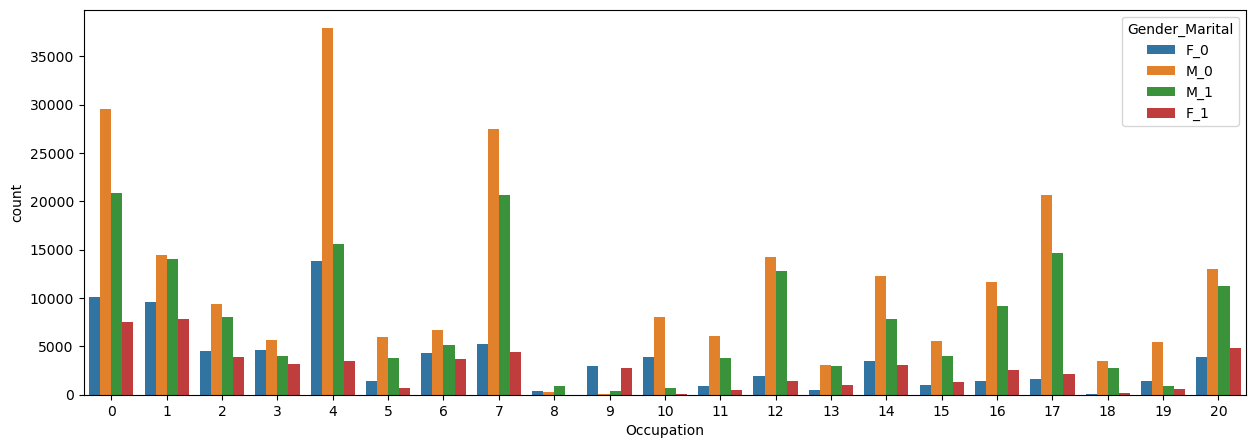

In [46]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x=df['Occupation'],hue=df['Gender_Marital'])
plt.show()

###### 1.The analysis indicates a significant concentration of unmarried males within occupation 4, highlighting a strategic opportunity to prioritize products tailored to this demographic. 
###### 2.Moreover, married females predominantly occupy roles in categories 0, 1, 2, 3, 6, 7, and 20. Capitalizing on these insights by promoting products aligned with these occupations is poised to enhance our market penetration and drive sales growth."

### Here are the few questions from business point of view:

##### 1.Which demographic group (based on age, gender, and marital status) has the highest purchasing power?

Based on age : 26-35 ;                                                                                                                        Based on Gender: Male ;
Based on Marital_status: Unmarried

##### 2.What are the top-selling products ?

'P00265242', 'P00110742', 'P00025442', 'P00112142', 'P00057642', 'P00184942', 'P00046742', 'P00058042', 'P00059442', 'P00145042'

##### 3.What are top 5 occupation has the highest purchasing behavior ?

'4','0','7','1','17'--- are the top 5 occupation

##### 4. Are there significant differences in the types of products purchased by males and females?

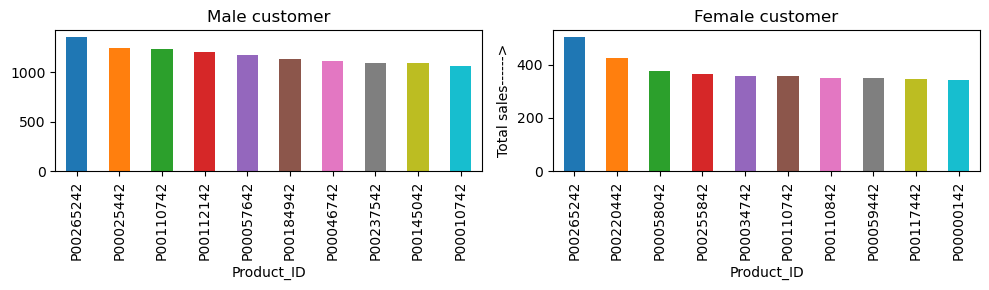

In [47]:
male=df[df['Gender']=='M']
female=df[df['Gender']=='F']
fig,axes=plt.subplots(1,2,figsize=(10,3))

male.groupby('Product_ID').size().nlargest(10).sort_values(ascending =False).plot(kind='bar',title='Male customer',color=colors,ax=axes[0])
plt.ylabel('Total sales------>')


female.groupby('Product_ID').size().nlargest(10).sort_values(ascending =False).plot(kind='bar',color=colors,ax=axes[1])
plt.ylabel('Total sales------>')
plt.ylabel('Total sales------>')
plt.title('Female customer')

plt.tight_layout()
plt.show()

The visualization above highlights that among the top 10 products favored by male and female customers, two products (P00265242 and P00110742) are consistently popular across both genders.

##### 5.How does marital status influence purchasing behavior, and which combination of gender and marital status shows the highest engagement?

Unmarried customers make more purchases than married customers, with unmarried males showing the highest engagement.
